# Geminga gaussian likelihood

In [1]:
%matplotlib inline
from importlib import reload
import main, light_curve
import corner
import warnings
warnings.filterwarnings('error')

### load all data

In [2]:
%%time 
self = main.Main('Geminga',  interval=1, mjd_range=None,        
                 weight_file='../data/geminga_weights.pkl')

Source Geminga at: (l,b)=(195.134,4.266); ROI radius=5
Loading data from 127 months 
	Selected 1344372 photons within 5 deg of  (195.13,4.27)
	Dates: 2008-08-04 15:45 - 2018-08-02 18:48
	MJD  : 54682.7          - 58332.8         
Adding weights from file /nfs/farm/g/glast/u/burnett/analysis/lat_timing/data/geminga_weights.pkl
	242 / 1331395 photon pixels are outside weight region
	212440 weights set to NaN
CPU times: user 1min 10s, sys: 12.6 s, total: 1min 23s
Wall time: 1min 16s


#### Create a BinnedWeights object 

In [3]:
bw=self.binned_weights()

Binning: 3650 intervals of 1 days from 54683.00 to 58333.00


#### Now pass that to the LightCurve class, which does fitting -- Gaussian here

In [111]:
reload(light_curve)
lc = light_curve.LightCurve(bw, rep='gauss'); 
lc.fit()

Loaded 3562 / 3650 cells with exposure > 0.3 for light curve analysis


In [112]:
lc.fit_df.head()

,t,exp,counts,flux,sig_flux
0,54683.5,1.243832,379.0,0.946243,0.070232
1,54684.5,1.196106,399.0,1.130462,0.076982
2,54685.5,1.163705,385.0,1.159045,0.078502
3,54686.5,1.384493,440.0,1.029609,0.068750
4,54687.5,1.278032,387.0,0.990316,0.070152


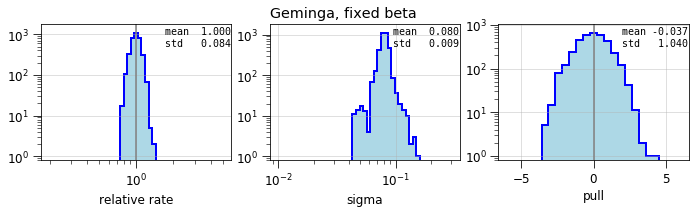

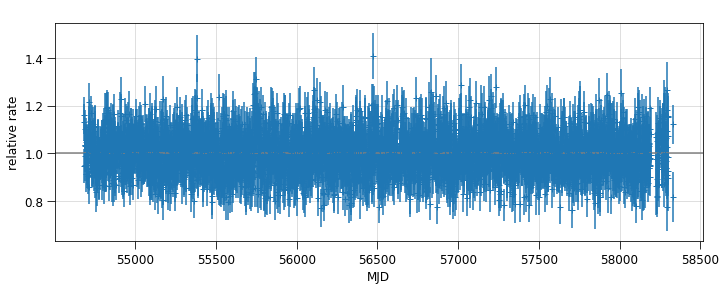

In [113]:
lc.fit_hists(title = 'Geminga, fixed beta')
lc.flux_plot(title=' ')

In [114]:
df = lc.fit_df
df.loc[:,'pull']=(df.flux-1)/df.sig_flux

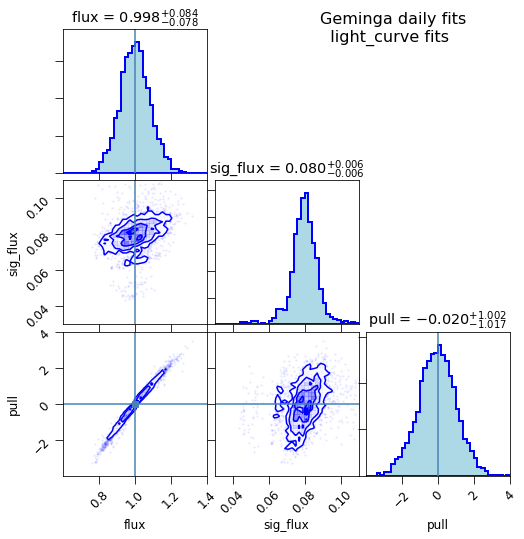

In [115]:
corner.corner(df['flux sig_flux pull'.split()], bins=40, 
              range=[(0.6,1.4), (0.03,0.11),(-4,4)],
              color='blue',show_titles=True, truths=(1.0,None, 0), title_fmt='.3f', 
              hist_kwargs=dict(histtype='stepfilled',facecolor='lightblue', lw=2, edgecolor='blue', log=False));
plt.gcf().suptitle('Geminga daily fits\n  light_curve fits', x=0.6, ha='left', fontsize=16);